In [792]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

%matplotlib inline

In [2]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Functions for later use

In [368]:
def training_errors(model, x_train, y_train): 
    #y_train_predicted = model.predict(x_train)
    
    train_accuracy = model.score(x_train, y_train)
    print('Training Accuracy =', train_accuracy)
    print('')
    return train_accuracy

In [343]:
def accuracy_confusion_mat(model, x_test, y_test, y_predicted):
    acc_score = model.score(x_test, y_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
    
    total = np.sum(confusion_matrix)
    
    print('Total number of observations = ', total)
    #print('Accuracy = ', round(acc_score, 2))
    
    #print('\nConfusion Matrix:\n', confusion_matrix)

    return acc_score, confusion_matrix

In [306]:
def confusion_plt(confusion_matrix, acc_score):
    plt.figure( figsize = (3, 3))
    sns.heatmap(confusion_matrix, annot = True, fmt=".3f", linewidths = .5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

    #acc_score = round(acc_score, 2)

    all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
    plt.title(all_sample_title, size = 13)

In [276]:
def confusion_perc_plt(confusion_matrix, acc_score):
    total = np.sum(confusion_mat)
    perc_confusion_matrix = confusion_mat/total
    
    plt.figure( figsize = (3, 3))
    sns.heatmap(perc_confusion_matrix, annot = True, fmt=".3f", linewidths = .5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

    acc_score = round(acc_score, 2)

    all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
    plt.title(all_sample_title, size = 13)
    
    return total

In [440]:
def errors(confusion_matrix):
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    print('\nTP =', TP, '\nTN =', TN, '\nFP =', FP, '\nFN =', FN)
    
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    print('\nValidation Accuracy = ', accuracy)
        
    return TP, TN, FP, FN, accuracy

In [359]:
def precision_recall(TP, TN, FP, FN):
    diagnosed_as_survived = TP + FP
    really_survived = TP + FN

    # among all cases that were found positive, what a % of actual positive cases
    precision = TP/diagnosed_as_survived
    # percentage of the people who indeed survived out of all cases that the model classified as 'survived' 
    # ex., % of really sick people that the test diagnosted as sick. 
    # if you were diagnosted as ill, what is the chance that you are really ill

    # percentage of correctly diagnosted people
    recall = TP/really_survived
    
    print('Precision =', precision , '\nRecall =', recall)
    
    print('\n*Precision: among all cases that were found positive, what is the proportion of actual positive cases TP/(TP + FP)')
    print('*Recall: percentage of correctly diagnosted people among all survived TP/(TP + FN)')
    
    return precision, recall

In [773]:
def train_acc(model, x_train, y_train):
    # train accuracy
    y_predicted_train = model.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, y_predicted_train)
    return train_acc

In [778]:
def test_acc(model,x_test, y_test):
    # test accuracy
    y_predicted_test = model.predict(x_test)
    validation_acc = metrics.accuracy_score(y_test, y_predicted_test)
    return validation_acc

#### Import the Data

In [3]:
data = pd.read_csv('C:\\Users\\Inna\\Desktop\\scripts\\Titanic\\train.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sibsp 	# of siblings / spouses aboard the Titanic
# parch 	# of parents / children aboard the Titanic

In [6]:
print('The dataset provides Titanic passengers’ information. It includes', data.shape[0], 
      'records and', data.shape[1], 'features')

The dataset provides Titanic passengers’ information. It includes 891 records and 11 features


In [7]:
print('The list of the features:', list(data.columns))

The list of the features: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


#### Creating Dummy Variables 

#### Create dummy variables for sex (1 = female, 0 = male) and the port of embarktion (1 = C = Cherbourg, 2 = Q = Queenstown, 3 = S = Southampton)

In [8]:
data['Sex_num'] = data.Sex.map({'female':1, 'male':0})
# data['Embarked_num'] = data.Embarked.map({'C':1, 'Q':2, 'S':3})

In [9]:
# One-hot vectors for the port of emabarking: 
# 1. create vectors of zeros: 
data_len = len(data['Name'])
data['Cherbourg'] = pd.Series(np.zeros(data_len), index = data.index)
data['Queenstown'] = pd.Series(np.zeros(data_len), index = data.index)
data['Southampton'] = pd.Series(np.zeros(data_len), index = data.index)

# 2. encode the data into these vectors acording to the port of embarktion: 
data['Cherbourg'] = data['Cherbourg'].where(data['Embarked'] != 'C', 1)
data['Queenstown'] = data['Queenstown'].where(data['Embarked'] != 'Q', 1)
data['Southampton'] = data['Southampton'].where(data['Embarked'] != 'S', 1)

In [10]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0,0.0,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,0.0,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.0,0.0,1.0


In [11]:
print('The updated dataset provides Titanic passengers’ information. It includes', data.shape[0], 
      'records and', data.shape[1], 'features')
print('The updated list of the features:', list(data.columns))

The updated dataset provides Titanic passengers’ information. It includes 891 records and 15 features
The updated list of the features: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num', 'Cherbourg', 'Queenstown', 'Southampton']


#### Taking Care of Missing Values

In [12]:
# Missing Values 
missingV = data.isnull().sum()
missingV.percent = missingV/len(data)*100
missingV.percent

Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Sex_num         0.000000
Cherbourg       0.000000
Queenstown      0.000000
Southampton     0.000000
dtype: float64

Observations: 
Age - 20% missing values, Cabin num - 77% missing values. 

In [13]:
threshold1 = len(data)*0.7
data.dropna(axis = 1, thresh = threshold1, inplace = True) #removes features that have more than 70% missing values
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0.0,0.0,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0.0,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0.0,0.0,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0.0,0.0,1.0


Observations: Cabin feature has been removes since there are more than 70% missing values

#### Quick Data Exploration

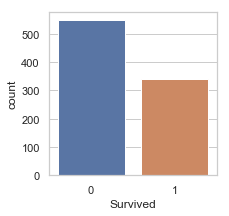

In [280]:
plt.figure(figsize = (3, 3))
sns.countplot(x = 'Survived', data = data)
plt.show()
# plt.savefig('Count Plot')

In [15]:
survivorsPerc = data.where(data['Survived'] == 1).count()[0] / len(data) * 100
print('Percentage of survivors is', int(survivorsPerc))
print('Percentage of victims is', 100-int(survivorsPerc))
print('The ratio of survivors to victims is', int(survivorsPerc), ':', 100-int(survivorsPerc))

Percentage of survivors is 38
Percentage of victims is 62
The ratio of survivors to victims is 38 : 62


Observations: 
Classes are slightly inbalanced

In [16]:
data.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Sex_num,Cherbourg,Queenstown,Southampton
Survived,,,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.147541,0.136612,0.085610,0.777778
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.681287,0.271930,0.087719,0.634503


In [17]:
data.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Cherbourg,Queenstown,Southampton
Survived,,,,,,,,,,,,,
0,549,549,549,424,549,549,549,549,549,549,549,549,549
1,342,342,342,290,342,342,342,342,340,342,342,342,342


#### Observations: 
1. Ticket class (Pclass) of survived is higher than vistims' class
2. Survivors' tickets were much more expensive than vistims' (Fare)
3. There is no substantial difference between the age of survivors and victims
4. Women had more chance to survive than men
5. classes are inballanced



In [18]:
data.groupby('SibSp').count()

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked,Sex_num,Cherbourg,Queenstown,Southampton
SibSp,,,,,,,,,,,,,
0,608,608,608,608,471,608,608,608,606,608,608,608,608
1,209,209,209,209,183,209,209,209,209,209,209,209,209
2,28,28,28,28,25,28,28,28,28,28,28,28,28
3,16,16,16,16,12,16,16,16,16,16,16,16,16
4,18,18,18,18,18,18,18,18,18,18,18,18,18
5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,7,7,7,7,0,7,7,7,7,7,7,7,7


In [19]:
survivors = data.where(data.Survived == 1)
victims = data.where(data.Survived == 0)
#survivors.count()

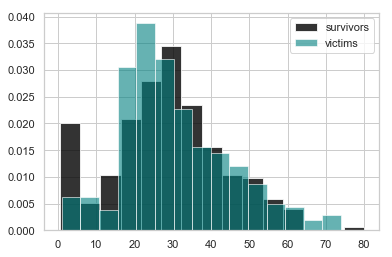

In [20]:
plt.figure(1)

survivors.Age.hist(bins = 15, color = 'black', density = True, alpha = 0.8)  
# density: normalization to form probability density, pdf
victims.Age.hist(bins = 15, color='teal', alpha = 0.6, density = True)  # alpha = transperancy
plt.legend(['survivors', 'victims'])


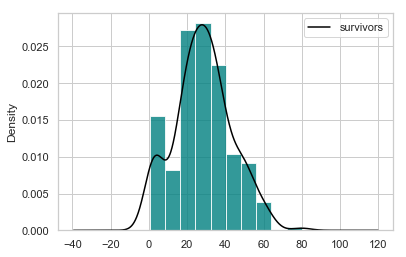

In [21]:
plt.figure(2)

survivors.Age.hist(bins = 10, color = 'teal', alpha = 0.8, density = True)
survivors.Age.plot(kind='density', color='black')
plt.legend(['survivors'])

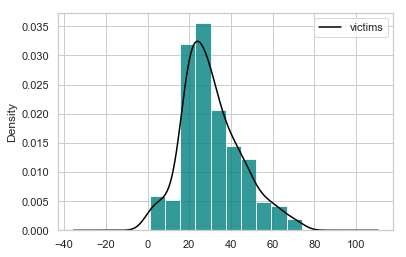

In [22]:
plt.figure(3)

victims.Age.hist(bins = 10, color = 'teal', alpha = 0.8, density = True)
victims.Age.plot(kind='density', color='black')
plt.legend(['victims'])

#### Preprocessing

#### Oversampling for balancing classes - creating synthetic observations

In [23]:
data2 = data.copy()

# Filling missing data
data2.fillna(data2.Age.median(),inplace = True)
#traindata.fillna(traindata.Embarked_num.mode(),inplace = True)

data2.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Sex_num        0
Cherbourg      0
Queenstown     0
Southampton    0
dtype: int64

In [24]:
corrs = data2.corr()
corrs

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Cherbourg,Queenstown,Southampton
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,-0.243292,0.221009,0.081720
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.030248,-0.031415,-0.014665
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,0.269335,-0.117216,-0.166603
Sex_num,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,0.082853,0.074115,-0.125722
Cherbourg,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,0.082853,1.000000,-0.148258,-0.778359
Queenstown,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,0.074115,-0.148258,1.000000,-0.496624
Southampton,-0.155660,0.081720,-0.014665,0.070941,0.063036,-0.166603,-0.125722,-0.778359,-0.496624,1.000000


# Prediction Models

##### + ADD Recursive Feature Elimination

##### + ADD cross-validation (k-fold)

##### + Take care of imbalanced classes (SMOTE)

#### Hyperparameters

In [651]:
test_size = 0.2

### Model 1 - Multivariate Linear Logistic Regression

#### Since there is a high collinearity between a Fare and a class ("Pclass"), we will include only the fare in the model. 

In [307]:
X = data2.loc[:, ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Cherbourg', 'Queenstown', 'Southampton']]
y = data2.loc[:, data2.columns == 'Survived']

In [308]:
X.head()

,Age,SibSp,Parch,Fare,Sex_num,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,
1,22.0,1,0,7.2500,0,0.0,0.0,1.0
2,38.0,1,0,71.2833,1,1.0,0.0,0.0
3,26.0,0,0,7.9250,1,0.0,0.0,1.0
4,35.0,1,0,53.1000,1,0.0,0.0,1.0
5,35.0,0,0,8.0500,0,0.0,0.0,1.0


#### Cross-validation

In [309]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 100)

#### Model the data

In [310]:
model = LogisticRegression().fit(x_train,y_train)
y_predicted = model.predict(x_test)

C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Model's Parameters

In [311]:
model.coef_

array([[-0.0222642 , -0.35157276, -0.24407122,  0.01462802,  2.52912134,
         0.09258188, -0.61307576, -0.41240285]])

In [312]:
y_predicted = model.predict(x_test)
y_predicted.shape

(179,)

### Measuring Model Performance

##### Accuracy (correct predictions / total number of data points), Confusion Matrix, Precision & Recall

Training error (accuracy) = 0.800561797752809

Total number of observations =  179
Accuracy =  0.8

TP = 54 
TN = 91 
FP = 13 
FN = 21
Accuracy =  0.8100558659217877

Precision = 0.8059701492537313 
Recall = 0.72


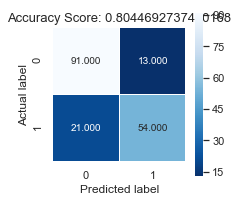

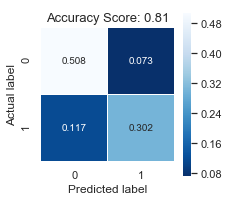

In [329]:
# Measuring Model Performance
training_errors(model, x_train, y_train)
[acc, confusion_mat] = accuracy_confusion_mat(model, x_test, y_test, y_predicted)
confusion_plt(confusion_mat, acc)
confusion_perc_plt(confusion_matrix, acc_score)
[TP, TN, FP, FN, accuracy] = errors(confusion_mat)
precision, recall = precision_recall(TP, TN, FP, FN)

### Model 2 - all numerical features for Logistic Regression

In [332]:
X = data2.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Cherbourg', 'Queenstown', 'Southampton']]
y = data2.loc[:, data2.columns == 'Survived']

In [804]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 100)
model = LogisticRegression().fit(x_train,y_train)
y_predicted = model.predict(x_test)

C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [805]:
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [334]:
y_predicted = model.predict(x_test)

#### Model's Evaluation

Training error (accuracy) = 0.800561797752809

Total number of observations =  179
Accuracy =  0.8

TP = 53 
TN = 91 
FP = 13 
FN = 22
Accuracy =  0.8044692737430168

Precision = 0.803030303030303 
Recall = 0.7066666666666667


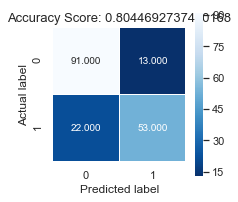

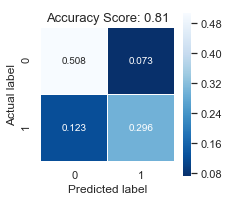

In [335]:
# Measuring Model Performance
training_errors(model, x_train, y_train)
[acc, confusion_mat] = accuracy_confusion_mat(model, x_test, y_test, y_predicted)
confusion_plt(confusion_mat, acc)
confusion_perc_plt(confusion_matrix, acc_score)
[TP, TN, FP, FN, accuracy] = errors(confusion_mat)
precision, recall = precision_recall(TP, TN, FP, FN)

### Model 3 - Decision Tree Classifier

#### Decision tree training

#### Choose the best model

In [732]:
# Hyperparameters
num_of_models = 20

In [733]:
param_dict = {'model_depth': [], 'train_accuracy': [], 'validation_accuracy': [], 'precision': [], 'recall': []}
param_dict

{'model_depth': [],
 'train_accuracy': [],
 'validation_accuracy': [],
 'precision': [],
 'recall': []}

In [734]:
for i in range(num_of_models): 
    
    depth = i + 1 
    
    # training the model with different max depth
    model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth = depth, min_samples_leaf = 5, min_samples_split = 10).fit(x_train, y_train)
    print(model)
    # train accuracy
    #train_acc1 = model.score(x_train, y_train)
    y_predicted_train = model.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, y_predicted_train)

    # test accuracy
    #validation_acc = model.score(x_test, y_test)
    y_predicted_test = model.predict(x_test)
    validation_acc = metrics.accuracy_score(y_test, y_predicted_test)
        
    # precision and recall calculations: 
    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_test)
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    
    # appending the results to the dict: 
    param_dict['model_depth'].append(depth)
    param_dict['train_accuracy'].append(train_acc)
    param_dict['validation_accuracy'].append(validation_acc)
    param_dict['precision'].append(precision)
    param_dict['recall'].append(recall)

    
param_dict_df = pd.DataFrame(data = param_dict)
param_dict_df

,model_depth,train_accuracy,validation_accuracy,precision,recall
0,1,0.786517,0.787709,0.768116,0.706667
1,2,0.792135,0.765363,0.971429,0.453333
2,3,0.825843,0.810056,0.805970,0.720000
3,4,0.834270,0.815642,0.808824,0.733333
4,5,0.842697,0.810056,0.815385,0.706667
5,6,0.842697,0.810056,0.815385,0.706667
6,7,0.853933,0.821229,0.877193,0.666667
7,8,0.863764,0.854749,0.876923,0.760000
8,9,0.863764,0.843575,0.861538,0.746667
9,10,0.863764,0.843575,0.861538,0.746667


#### Models' Accuracy as a Function of its Complexity

Text(0.5, 1.0, "Accuracy as a Function of Model's Complexity")

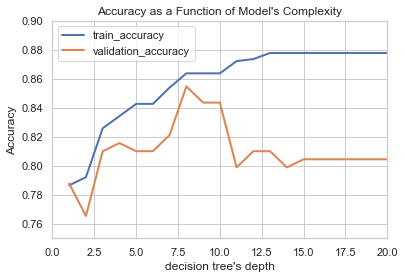

In [735]:
plt.figure()

plt.plot(param_dict_df.model_depth, param_dict_df.train_accuracy, linewidth = 2)
plt.plot(param_dict_df.model_depth, param_dict_df.validation_accuracy, linewidth = 2)
#plt.plot('train_accuracy', 'validation_accuracy', data = param_dict_df)
plt.xlim(0, num_of_models)
plt.ylim(0.75, 0.9)
plt.legend()
plt.xlabel("decision tree's depth")
plt.ylabel("Accuracy")
plt.title("Accuracy as a Function of Model's Complexity")

Text(0.5, 1.0, "Precision and Recall as a Function of Model's Complexity")

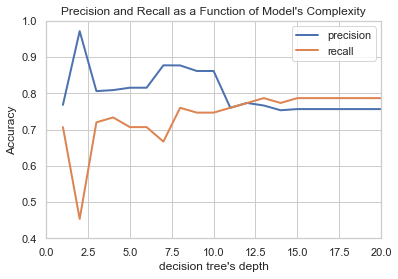

In [736]:
plt.figure()

plt.plot(param_dict_df.model_depth, param_dict_df.precision, linewidth = 2)
plt.plot(param_dict_df.model_depth, param_dict_df.recall, linewidth = 2)
plt.xlim(0, num_of_models)
plt.ylim(0.4, 1)
plt.legend()
plt.xlabel("decision tree's depth")
plt.ylabel("Accuracy")
plt.title("Precision and Recall as a Function of Model's Complexity")

Text(0.5, 1.0, "Accuracy as a Function of Model's Complexity")

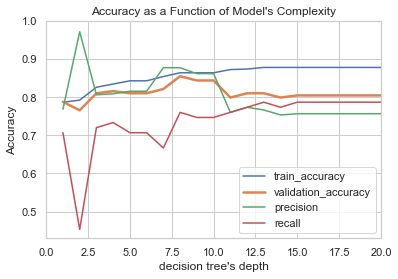

In [737]:
plt.figure()
plt.plot(param_dict_df.model_depth, param_dict_df.train_accuracy, linewidth = 1.5)
plt.plot(param_dict_df.model_depth, param_dict_df.validation_accuracy, linewidth = 2.5)
plt.plot(param_dict_df.model_depth, param_dict_df.precision, linewidth = 1.5)
plt.plot(param_dict_df.model_depth, param_dict_df.recall, linewidth = 1.5)
plt.xlim(0, num_of_models)
plt.ylim(0.43, 1)
plt.legend()
plt.xlabel("decision tree's depth")
plt.ylabel("Accuracy")
plt.title("Accuracy as a Function of Model's Complexity")

In [738]:
max_validation_acc = param_dict_df.validation_accuracy.max()
best_model_params = param_dict_df.loc[param_dict_df.validation_accuracy == max_validation_acc]
best_model_complexity = best_model_params.model_depth.max()
best_model_params
best_model_complexity.max()

8

In [739]:
max_recall = param_dict_df.loc[param_dict_df.recall == param_dict_df.recall.max()]
#max_recall.iloc[0, 0]
max_recall

,model_depth,train_accuracy,validation_accuracy,precision,recall
12,13,0.877809,0.810056,0.766234,0.786667
14,15,0.877809,0.804469,0.756410,0.786667
15,16,0.877809,0.804469,0.756410,0.786667
16,17,0.877809,0.804469,0.756410,0.786667
17,18,0.877809,0.804469,0.756410,0.786667
18,19,0.877809,0.804469,0.756410,0.786667
19,20,0.877809,0.804469,0.756410,0.786667


#### Best Model's Evaluation

In [740]:
best_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth = best_model_complexity, min_samples_leaf = 5, 
                                    min_samples_split = 10).fit(x_train, y_train)

Training Accuracy = 0.8637640449438202

Total number of observations =  179

TP = 57 
TN = 96 
FP = 8 
FN = 18

Validation Accuracy =  0.8547486033519553
Precision = 0.8769230769230769 
Recall = 0.76

*Precision: among all cases that were found positive, what is the proportion of actual positive cases TP/(TP + FP)
*Recall: percentage of correctly diagnosted people among all survived TP/(TP + FN)


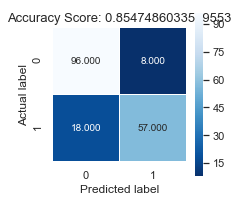

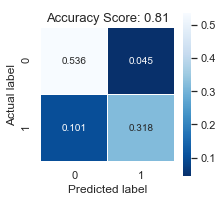

In [741]:
# Measuring Model Performance
y_predicted = best_model.predict(x_test)

training_errors(best_model, x_train, y_train)
[acc, confusion_mat] = accuracy_confusion_mat(best_model, x_test, y_test, y_predicted)
confusion_plt(confusion_mat, acc)
confusion_perc_plt(confusion_matrix, acc_score)
[TP, TN, FP, FN, accuracy] = errors(confusion_mat)
precision, recall = precision_recall(TP, TN, FP, FN)

In [742]:
best_model_params

,model_depth,train_accuracy,validation_accuracy,precision,recall
7,8,0.863764,0.854749,0.876923,0.76


### Model 4 - Decision Tree Classifier + "gini" method

#### Decision Trees, criterion = 'gini'

In [802]:
# Hyperparameters
num_of_models = 18

param_dict = {'model_depth': [], 'train_accuracy': [], 'validation_accuracy': [], 'precision': [], 'recall': []}
param_dict

{'model_depth': [],
 'train_accuracy': [],
 'validation_accuracy': [],
 'precision': [],
 'recall': []}

In [704]:
for i in range(num_of_models): 
    
    depth = i + 1 
    
    # training the model with different max depth
    model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth = depth, min_samples_leaf = 5, min_samples_split = 10).fit(x_train, y_train)
    # train accuracy
    #train_acc1 = model.score(x_train, y_train)
    y_predicted_train = model.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, y_predicted_train)

    # test accuracy
    #validation_acc = model.score(x_test, y_test)
    y_predicted_test = model.predict(x_test)
    validation_acc = metrics.accuracy_score(y_test, y_predicted_test)
        
    # precision and recall calculations: 
    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_test)
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    
    # appending the results to the dict: 
    param_dict['model_depth'].append(depth)
    param_dict['train_accuracy'].append(train_acc)
    param_dict['validation_accuracy'].append(validation_acc)
    param_dict['precision'].append(precision)
    param_dict['recall'].append(recall)

    
param_dict_df = pd.DataFrame(data = param_dict)
param_dict_df

,model_depth,train_accuracy,validation_accuracy,precision,recall
0,1,0.786517,0.787709,0.768116,0.706667
1,2,0.803371,0.765363,0.923077,0.480000
2,3,0.831461,0.810056,0.805970,0.720000
3,4,0.831461,0.810056,0.805970,0.720000
4,5,0.844101,0.804469,0.803030,0.706667
5,6,0.849719,0.821229,0.811594,0.746667
6,7,0.853933,0.821229,0.864407,0.680000
7,8,0.862360,0.843575,0.861538,0.746667
8,9,0.862360,0.843575,0.861538,0.746667
9,10,0.866573,0.837989,0.848485,0.746667


In [705]:
max_validation_acc = param_dict_df.validation_accuracy.max()
best_model_params = param_dict_df.loc[param_dict_df.validation_accuracy == max_validation_acc]
best_model_complexity = best_model_params.model_depth.max()
best_model_params
best_model_complexity.max()

9

##### --> Decisions that are based on "entropy" (test acc = 0.85) are slightly better than decision are based on "gini" (test acc = 0.84)

### Model 5 - Decision Tree Classifier with Bagging (Bootstrap Aggregation)

#### Decision tree + bagging with replacement
If we try complicated decision tree with bagging, does it compensate for overfitting? 

In [799]:
stump = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth = 20, min_samples_leaf = 5, 
                                    min_samples_split = 10)

In [800]:
model = ensemble.BaggingClassifier(base_estimator = stump).fit(x_train, y_train)

C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [801]:
print(model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


In [777]:
# train accuracy
train_accuracy = train_acc(model, x_train, y_train)
train_accuracy

0.8848314606741573

In [779]:
# test accuracy
test_accuracy = test_acc(model,x_test, y_test)
test_accuracy

0.8324022346368715

In [780]:
# precision and recall calculations: 
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_test)
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

precision = TP/(TP + FP)
recall = TP/(TP + FN)
precision

0.835820895522388

In [781]:
recall

0.7466666666666667

In [769]:
# Compare with the simple decision tree:
param_dict_df

,model_depth,train_accuracy,validation_accuracy,precision,recall
0,1,0.786517,0.787709,0.768116,0.706667
1,2,0.792135,0.765363,0.971429,0.453333
2,3,0.825843,0.810056,0.805970,0.720000
3,4,0.834270,0.815642,0.808824,0.733333
4,5,0.842697,0.810056,0.815385,0.706667
5,6,0.842697,0.810056,0.815385,0.706667
6,7,0.853933,0.821229,0.877193,0.666667
7,8,0.863764,0.854749,0.876923,0.760000
8,9,0.863764,0.843575,0.861538,0.746667
9,10,0.863764,0.843575,0.861538,0.746667


##### --> by ensemble bags we can use more complicated decision tree while keeping the same results
however, no significant improvement was found

### Model 6 - Random Forest
The same as bagging, but also chooses columns randomly

In [797]:
model = ensemble.RandomForestClassifier().fit(x_train, y_train)

C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Inna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [798]:
print(model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [783]:
train_accuracy = train_acc(model, x_train, y_train)
train_accuracy

0.9705056179775281

In [784]:
test_accuracy = test_acc(model,x_test, y_test)
test_accuracy

0.7932960893854749

##### --> overfitting

### Model 7 - XGBoost

In [806]:
model = XGBClassifier().fit(x_train, y_train)

C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Inna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [807]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [817]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy

0.8379888268156425

#### or by my functions: 

In [808]:
train_accuracy = train_acc(model, x_train, y_train)
train_accuracy

0.8848314606741573

In [809]:
test_accuracy = test_acc(model,x_test, y_test)
test_accuracy

0.8379888268156425

##### --> best model decision tree's accuracy is still higher (=0.85)

##### + ADD ROC Curve

### Polynomial Logistic Regression

In [683]:
# https://stackoverflow.com/questions/55937244/how-to-implement-polynomial-logistic-regression-in-scikit-learn/55944716#55944716